In [3]:
install.packages("leaflet")
install.packages("inputeTS")
install.packages("DT")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘lazyeval’, ‘gridExtra’, ‘crosstalk’, ‘htmlwidgets’, ‘png’, ‘raster’, ‘sp’, ‘viridis’, ‘leaflet.providers’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘inputeTS’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘later’, ‘promises’




In [5]:
install.packages("leaflet.extras")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [7]:
install.packages("imputeTS")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘xts’, ‘TTR’, ‘RCurl’, ‘jpeg’, ‘quadprog’, ‘quantmod’, ‘gridtext’, ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’, ‘ggtext’, ‘stinepack’, ‘forecast’




In [8]:
library(tidyverse)

#Maps Libraries
library(leaflet)
library(leaflet.extras)

#Color libraries
library(RColorBrewer)

#Date library
library(lubridate)

#TimeSeries forecasting libraries
library(imputeTS)
library(forecast)

#DataTable libraries
library(DT)

rm(list=ls())

fillColor = "#FFA07A"
fillColor2 = "#F1C40F"

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [10]:
BikeTrips = read_csv("/content/sample_data/austin_bikeshare_trips.csv")
BikeStations = read_csv("/content/sample_data/austin_bikeshare_stations.csv")


── Column specification ────────────────────────────────────────────────────────
cols(
  bikeid = col_double(),
  checkout_time = col_time(format = ""),
  duration_minutes = col_double(),
  end_station_id = col_double(),
  end_station_name = col_character(),
  month = col_double(),
  start_station_id = col_double(),
  start_station_name = col_character(),
  start_time = col_datetime(format = ""),
  subscriber_type = col_character(),
  trip_id = col_double(),
  year = col_double()
)



── Column specification ────────────────────────────────────────────────────────
cols(
  latitude = col_double(),
  location = col_character(),
  longitude = col_double(),
  name = col_character(),
  station_id = col_double(),
  status = col_character()
)




`summarise()` has grouped output by 'year', 'month'. You can override using the `.groups` argument.



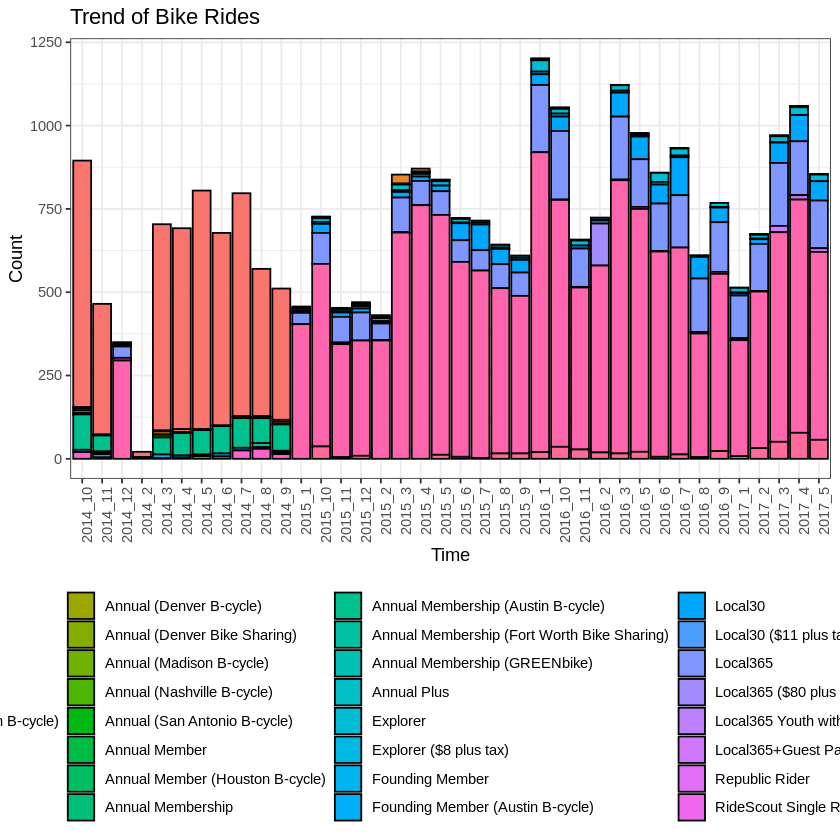

In [11]:
BikeTrips %>%
  filter(start_station_id == 2575) %>%
  filter(!is.na(subscriber_type)) %>%
  filter(!is.na(year)) %>%
  filter(!is.na(month)) %>%
  group_by(year,month,subscriber_type) %>%
  summarise(Count = n()) %>%
  ungroup() %>%
  mutate(subscriber_type = as.factor(subscriber_type)) %>%
  mutate(YearMonth = paste0(year,"_",month)) %>%
  arrange(year,month) %>%
  
  
  ggplot(aes(x=YearMonth,y=Count,fill = subscriber_type)) +
  geom_bar(stat = 'identity',colour="black") +
  labs(x = 'Time', y = 'Count',title = 'Trend of Bike Rides') +
  theme_bw() +
  guides(col = guide_legend(title.position = "top",nrow = 10, byrow = TRUE)) +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  theme(legend.position="bottom") 

`summarise()` has grouped output by 'year'. You can override using the `.groups` argument.



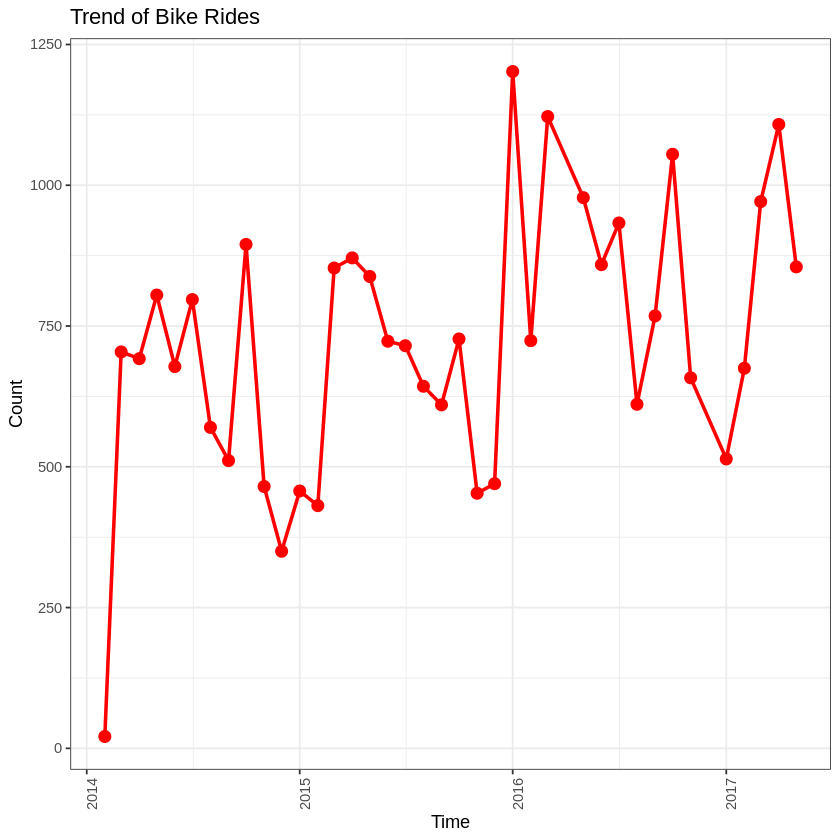

In [12]:
BikeTrips %>%
  filter(start_station_id == 2575) %>%
  filter(!is.na(year)) %>%
  filter(!is.na(month)) %>%
  group_by(year,month) %>%
  summarise(Count = n()) %>%
  mutate(YearMonth = make_date(year=year,month=month) ) %>%

  ggplot(aes(x=YearMonth,y=Count,group = 1)) +
  geom_line(size=1, color="red")+
  geom_point(size=3, color="red") +

  labs(x = 'Time', y = 'Count',title = 'Trend of Bike Rides') +
  theme_bw() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))

In [13]:
BikeStationMostTrips = BikeTrips %>%
  filter(start_station_id == 2575) %>%
  filter(!is.na(year)) %>%
  filter(!is.na(month)) %>%
  group_by(year,month) %>%
  summarise(Count = n()) %>%
  arrange(year,month)

dataRow1 = data.frame(year=2016,month= 4,Count=NA)
dataRow2 = data.frame(year=2016,month= 12,Count=NA)

BikeStationMostTrips = as.data.frame(BikeStationMostTrips)
BikeStationMostTrips = rbind(BikeStationMostTrips,dataRow1)
BikeStationMostTrips = rbind(BikeStationMostTrips,dataRow2)

BikeStationMostTrips = BikeStationMostTrips %>% arrange(year,month)

tsBikeStationMostTrips = ts(BikeStationMostTrips)

datatable((tsBikeStationMostTrips), style="bootstrap", class="table-condensed", options = list(dom = 'tp',scrollX = TRUE))

`summarise()` has grouped output by 'year'. You can override using the `.groups` argument.



HTML widgets cannot be represented in plain text (need html)

In [14]:
tsBikeStationMostTrips = na.interpolation(tsBikeStationMostTrips,option="stine")

Warning message:
“na.interpolation will be replaced by na_interpolation.
           Functionality stays the same.
           The new function name better fits modern R code style guidelines.
           Please adjust your code accordingly.”


# ETS

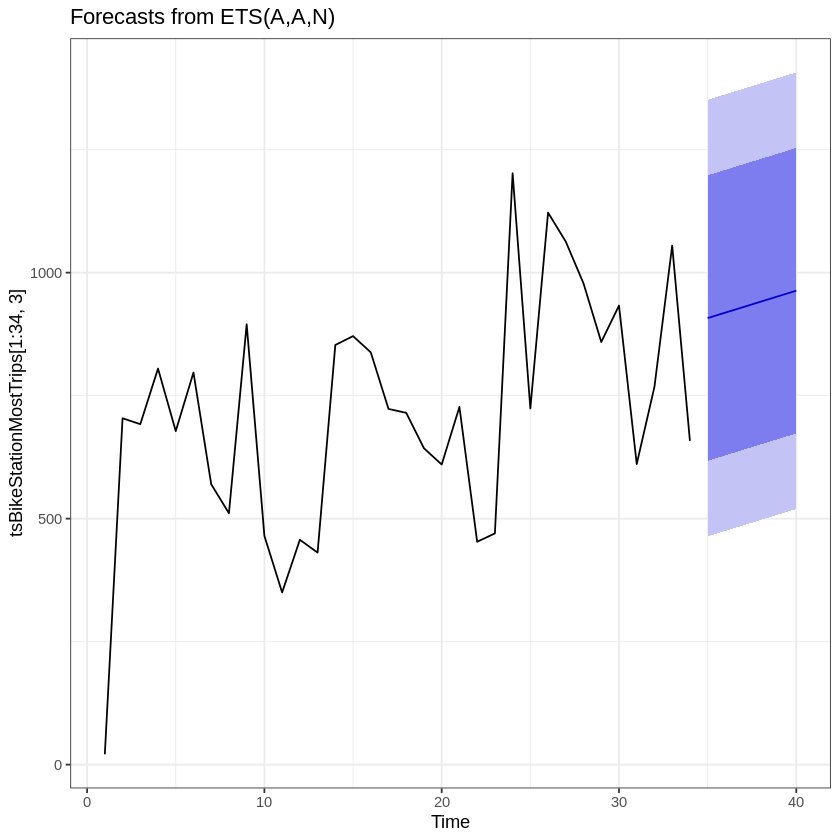

In [15]:
fit <- ets(tsBikeStationMostTrips[1:34,3])

preds = forecast(fit, h = 6)

preds %>% autoplot(include=34) +theme_bw()

# LINEAR REGRESSION

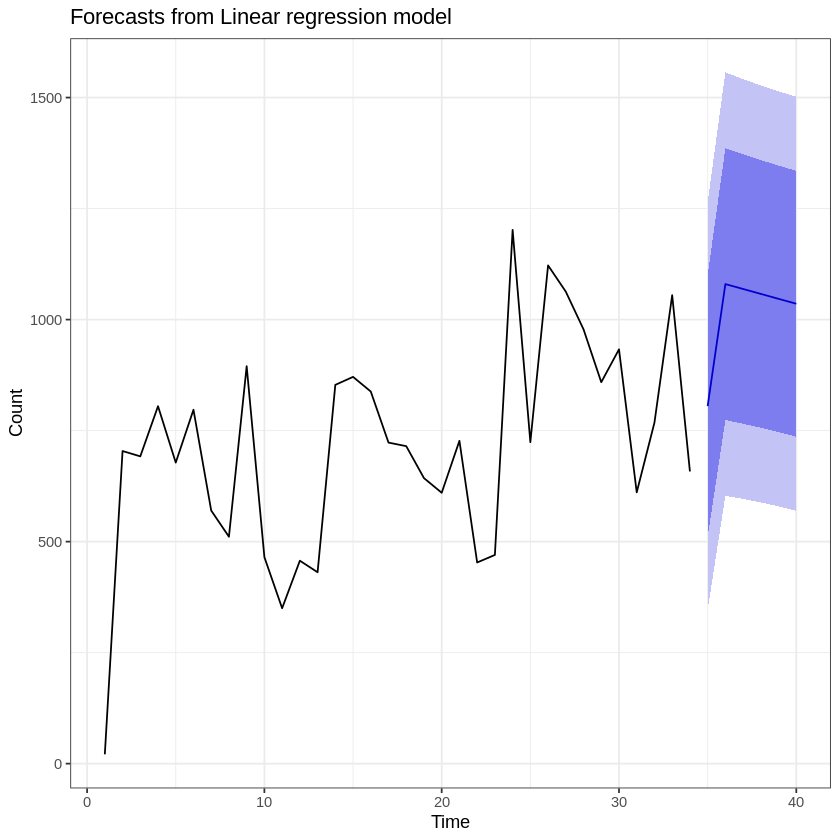

In [16]:
fit = tslm(Count ~ year + month,data = head(tsBikeStationMostTrips,34))

newdata = as.data.frame(tsBikeStationMostTrips[35:40,1:2])

preds = forecast(fit, newdata = newdata)

preds %>% autoplot(include=34) +theme_bw()

In [17]:
predictions = as.numeric(preds$mean)

cat("\n","The predictions are  ",predictions)


 The predictions are   805.1787 1079.989 1068.903 1057.817 1046.731 1035.644

In [18]:
error = sqrt( mean( (tsBikeStationMostTrips[35:40,3] - predictions)^2))

cat("\n","The RMSE is ", error)


 The RMSE is  309.7031

In [19]:
BikeTripsWeek = BikeTrips %>%
  filter(start_station_id == 2575) %>%
  mutate(WeekNo = week(ymd_hms(start_time))) %>%
  
  group_by(year,WeekNo) %>%
  summarise(Count = n()) %>%
  ungroup() %>%
  arrange(year,WeekNo)

for( i in  14:17)
{
  dataRow1 = data.frame(year=2016,WeekNo= i,Count=NA)
  BikeTripsWeek = rbind(BikeTripsWeek,dataRow1)
}

for( i in  49:53)
{
  dataRow1 = data.frame(year=2016,WeekNo= i,Count=NA)
  BikeTripsWeek = rbind(BikeTripsWeek,dataRow1)
}

BikeTripsWeek = BikeTripsWeek %>% arrange(year,WeekNo)

tsBikeStationMostTrips = ts(BikeTripsWeek)

datatable((tsBikeStationMostTrips), style="bootstrap", class="table-condensed", options = list(dom = 'tp',scrollX = TRUE))

`summarise()` has grouped output by 'year'. You can override using the `.groups` argument.



HTML widgets cannot be represented in plain text (need html)

In [20]:
tsBikeStationMostTrips = na.interpolation(tsBikeStationMostTrips,option="stine")

Warning message:
“na.interpolation will be replaced by na_interpolation.
           Functionality stays the same.
           The new function name better fits modern R code style guidelines.
           Please adjust your code accordingly.”


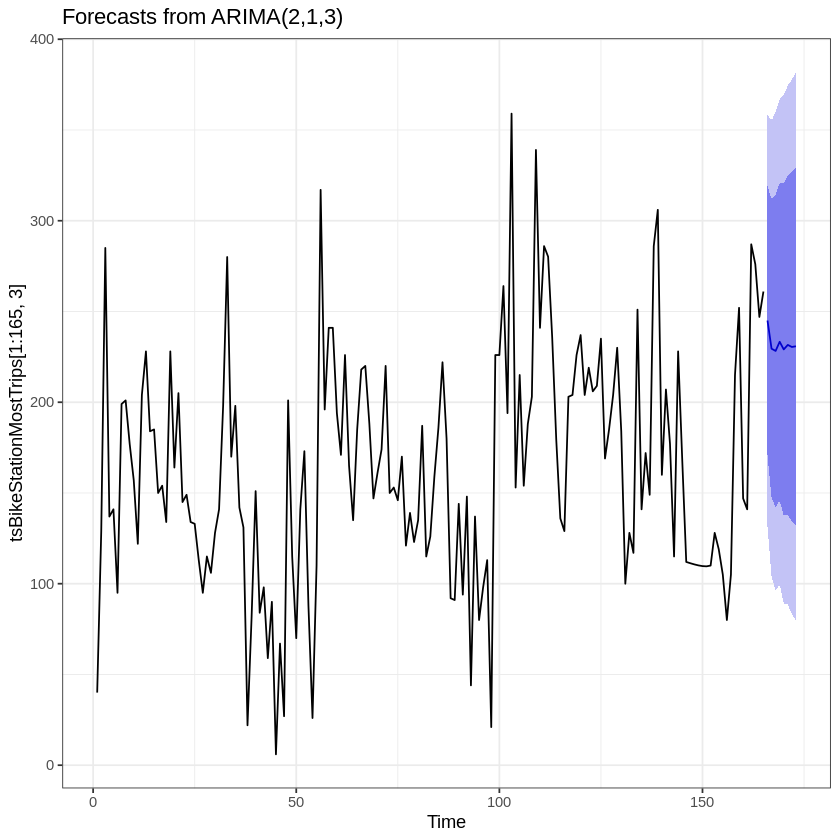

In [21]:
fit <- auto.arima(tsBikeStationMostTrips[1:165,3])

preds = forecast(fit, h = 8)

preds %>% autoplot(include=165) +theme_bw()

In [22]:
predictions = as.numeric(preds$mean)

cat("\n","The predictions are  ",predictions)


 The predictions are   245.0135 229.496 228.2634 233.3082 229.1107 231.582 230.4389 230.833

In [23]:
error = sqrt( mean( (tsBikeStationMostTrips[166:173,3] - predictions)^2))

cat("\n","The RMSE is ", error)


 The RMSE is  49.98345

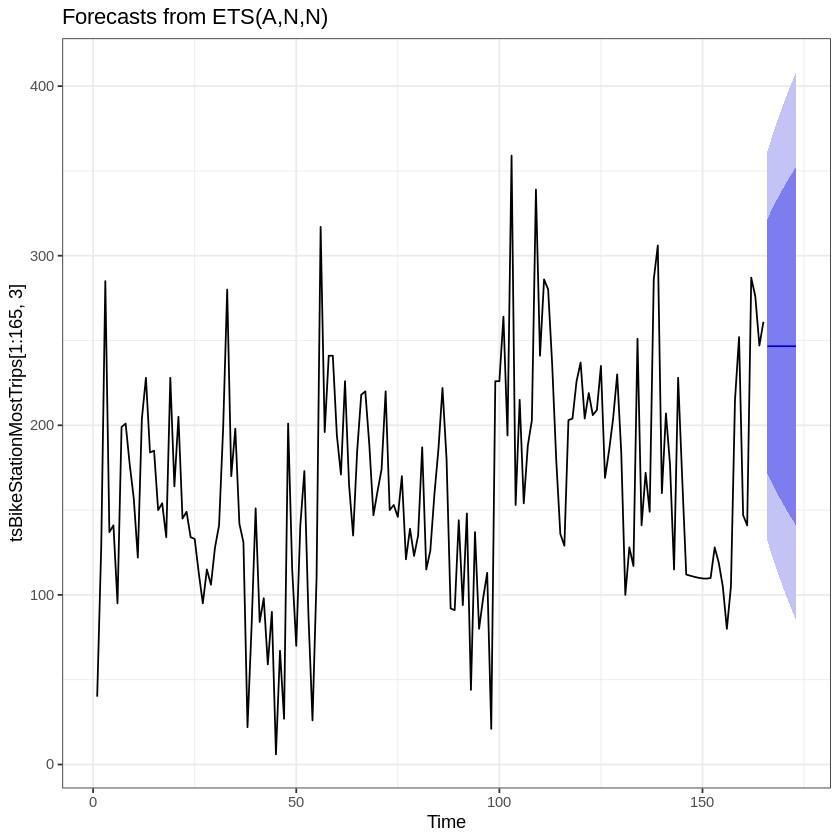

In [24]:
fit <- ets(tsBikeStationMostTrips[1:165,3])

preds = forecast(fit, h = 8)

preds %>% autoplot(include=165) +theme_bw()

In [25]:
predictions = as.numeric(preds$mean)

cat("\n","The predictions are  ",predictions)


 The predictions are   246.6376 246.6376 246.6376 246.6376 246.6376 246.6376 246.6376 246.6376

In [26]:
error = sqrt( mean( (tsBikeStationMostTrips[166:173,3] - predictions)^2))

cat("\n","The RMSE is ", error)


 The RMSE is  60.48429

# 2017


In [27]:
BikeTripsFestival = BikeTrips %>%
  filter(start_time >= ymd('2017-3-10')) %>%
  filter(start_time < ymd('2017-3-20'))

nrow(BikeTripsFestival)

[1] 14998

# 2016


In [33]:
BikeTripsFestival = BikeTrips %>%
  filter(start_time >= ymd('2016-3-11')) %>%
  filter(start_time < ymd('2016-3-21'))

nrow(BikeTripsFestival)

[1] 16964